####  Exploit the temporal information of the dataset preparing it for a univariate framework of analysis, i.e. select a feature and use it as your time series. You are welcome in using more than one reliable temporal split to have more time series of the same feature. You are welcome in creating more than a dataset using more than a feature and report the result on the feature you prefer or more than one. Analyze such datasets for finding motifs and/or anomalies and shaplets. Visualize and discuss them and their relationship with the class of the time series.

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('/Users/marco/Desktop/DataMining2Project-master-2/dataset_train+test2.csv')
df.head()

,date,Temperature,Humidity,Light,CO2,Occupancy,Ora,day,hour,absH,weekend,out_of_turn
0,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,1,2,4,17:51:00,17,0.0,1.0
1,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,1,2,4,17:51:59,17,0.0,1.0
2,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,1,2,4,17:53:00,17,0.0,1.0
3,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,1,2,4,17:54:00,17,0.0,1.0
4,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,1,2,4,17:55:00,17,0.0,1.0


In [3]:
df.sort_index(inplace = True)

In [4]:
df.sort_values(by='date',inplace=True)

In [5]:
df = df.reset_index(drop=True)

In [6]:
df.head()

,date,Temperature,Humidity,Light,CO2,Occupancy,Ora,day,hour,absH,weekend,out_of_turn
0,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,1,2,4,17:51:00,17,0.0,1.0
1,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,1,2,4,17:51:59,17,0.0,1.0
2,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,1,2,4,17:53:00,17,0.0,1.0
3,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,1,2,4,17:54:00,17,0.0,1.0
4,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,1,2,4,17:55:00,17,0.0,1.0


In [7]:
wed1 = df[df.day==4]
wed1 = wed1[['date','CO2', 'Temperature', 'Light' , 'Humidity' ,"hour"]]
#mercoledì
print(wed1['date'].unique())
#dalle 17.53 alle 23.59

['2015-02-04 17:51:00' '2015-02-04 17:51:59' '2015-02-04 17:53:00'
 '2015-02-04 17:54:00' '2015-02-04 17:55:00' '2015-02-04 17:55:59'
 '2015-02-04 17:57:00' '2015-02-04 17:57:59' '2015-02-04 17:58:59'
 '2015-02-04 18:00:00' '2015-02-04 18:01:00' '2015-02-04 18:02:00'
 '2015-02-04 18:03:00' '2015-02-04 18:04:00' '2015-02-04 18:04:59'
 '2015-02-04 18:06:00' '2015-02-04 18:07:00' '2015-02-04 18:08:00'
 '2015-02-04 18:08:59' '2015-02-04 18:10:00' '2015-02-04 18:10:59'
 '2015-02-04 18:11:59' '2015-02-04 18:13:00' '2015-02-04 18:14:00'
 '2015-02-04 18:15:00' '2015-02-04 18:16:00' '2015-02-04 18:16:59'
 '2015-02-04 18:17:59' '2015-02-04 18:19:00' '2015-02-04 18:20:00'
 '2015-02-04 18:21:00' '2015-02-04 18:22:00' '2015-02-04 18:23:00'
 '2015-02-04 18:23:59' '2015-02-04 18:24:59' '2015-02-04 18:26:00'
 '2015-02-04 18:27:00' '2015-02-04 18:28:00' '2015-02-04 18:29:00'
 '2015-02-04 18:29:59' '2015-02-04 18:30:59' '2015-02-04 18:32:00'
 '2015-02-04 18:33:00' '2015-02-04 18:34:00' '2015-02-04 18:35

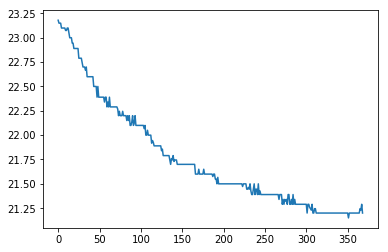

In [8]:
ts1 = wed1.Temperature
plt.plot(ts1)

plt.show()

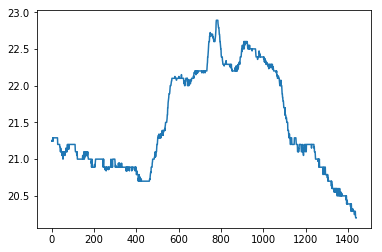

['2015-02-05 00:00:00' '2015-02-05 00:01:00' '2015-02-05 00:02:00' ...
 '2015-02-05 23:57:00' '2015-02-05 23:57:59' '2015-02-05 23:58:59']


In [9]:
thur1 = df[df.day==5]
thur1 = thur1[['date','CO2', 'Temperature', 'Light' , 'Humidity' ,"hour"]]
thur1.reset_index(inplace=True)

ts2 = thur1.Temperature
plt.plot(ts2)

plt.show()
print(thur1['date'].unique())
#giovedì

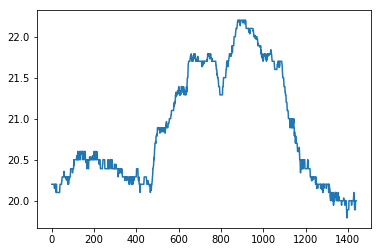

In [10]:
fri1 = df[df.day==6]
fri1 = fri1[['date','CO2', 'Temperature', 'Light' , 'Humidity' ,"hour"]]
fri1.reset_index(inplace=True)

ts3 = fri1.Temperature
plt.plot(ts3)

plt.show()
#sabato

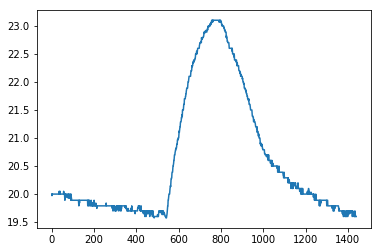

In [11]:
sat1 = df[df.day==7]
sat1 = sat1[['date','CO2', 'Temperature', 'Light' , 'Humidity' ,"hour"]]
sat1.reset_index(inplace=True)

ts4 = sat1.Temperature
plt.plot(ts4)

plt.show()
#sabato

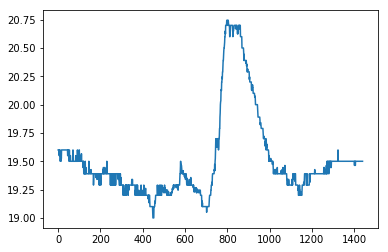

In [12]:
sun1 = df[df.day==8]
sun1 = sun1[['date','CO2', 'Temperature', 'Light' , 'Humidity' ,"hour"]]
sun1.reset_index(inplace=True)

ts5 = sun1.Temperature
plt.plot(ts5)

plt.show()
#venerdì

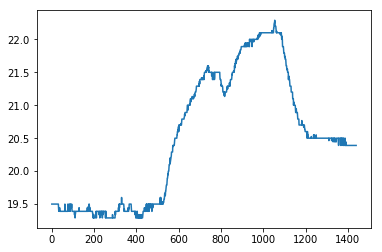

['2015-02-09 00:00:00' '2015-02-09 00:01:00' '2015-02-09 00:02:00' ...
 '2015-02-09 23:57:00' '2015-02-09 23:57:59' '2015-02-09 23:58:59']


In [13]:
mon2 = df[df.day==9]
mon2 = mon2[['date','CO2', 'Temperature', 'Light' , 'Humidity' ,"hour"]]
mon2.reset_index(inplace=True)

ts6 = mon2.Temperature
plt.plot(ts6)

plt.show()
#lunedi
print(mon2['date'].unique())

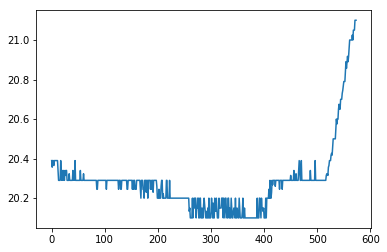

<bound method Series.unique of 0      2015-02-10 00:00:00
1      2015-02-10 00:01:00
2      2015-02-10 00:02:00
3      2015-02-10 00:03:00
4      2015-02-10 00:04:00
5      2015-02-10 00:04:59
6      2015-02-10 00:06:00
7      2015-02-10 00:07:00
8      2015-02-10 00:08:00
9      2015-02-10 00:08:59
10     2015-02-10 00:10:00
11     2015-02-10 00:10:59
12     2015-02-10 00:11:59
13     2015-02-10 00:13:00
14     2015-02-10 00:14:00
15     2015-02-10 00:15:00
16     2015-02-10 00:16:00
17     2015-02-10 00:16:59
18     2015-02-10 00:17:59
19     2015-02-10 00:19:00
20     2015-02-10 00:20:00
21     2015-02-10 00:21:00
22     2015-02-10 00:22:00
23     2015-02-10 00:23:00
24     2015-02-10 00:23:59
25     2015-02-10 00:24:59
26     2015-02-10 00:26:00
27     2015-02-10 00:27:00
28     2015-02-10 00:28:00
29     2015-02-10 00:29:00
              ...         
544    2015-02-10 09:04:00
545    2015-02-10 09:04:59
546    2015-02-10 09:06:00
547    2015-02-10 09:07:00
548    2015-02-10 09:08:

In [14]:
thue2 = df[df.day==10]
thue2 = thue2[['date','CO2', 'Temperature', 'Light' , 'Humidity' ,"hour"]]
thue2.reset_index(inplace=True)

ts7 = thue2.Temperature
plt.plot(ts7)

plt.show()
print(thue2['date'].unique)
#martedi
#le rilevazioni vanno dalle 00.00 alle 09.33


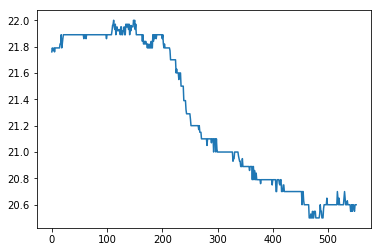

<bound method Series.unique of 0      2015-02-11 14:48:00
1      2015-02-11 14:49:00
2      2015-02-11 14:50:00
3      2015-02-11 14:51:00
4      2015-02-11 14:51:59
5      2015-02-11 14:53:00
6      2015-02-11 14:54:00
7      2015-02-11 14:55:00
8      2015-02-11 14:55:59
9      2015-02-11 14:57:00
10     2015-02-11 14:57:59
11     2015-02-11 14:58:59
12     2015-02-11 15:00:00
13     2015-02-11 15:01:00
14     2015-02-11 15:02:00
15     2015-02-11 15:03:00
16     2015-02-11 15:04:00
17     2015-02-11 15:04:59
18     2015-02-11 15:06:00
19     2015-02-11 15:07:00
20     2015-02-11 15:08:00
21     2015-02-11 15:08:59
22     2015-02-11 15:10:00
23     2015-02-11 15:10:59
24     2015-02-11 15:11:59
25     2015-02-11 15:13:00
26     2015-02-11 15:14:00
27     2015-02-11 15:15:00
28     2015-02-11 15:16:00
29     2015-02-11 15:16:59
              ...         
522    2015-02-11 23:30:00
523    2015-02-11 23:31:00
524    2015-02-11 23:31:59
525    2015-02-11 23:32:59
526    2015-02-11 23:34:

In [15]:
wed2 = df[df.day==11]
wed2 = wed2[['date','CO2', 'Temperature', 'Light' , 'Humidity' ,"hour"]]
wed2.reset_index(inplace=True)

ts8 = wed2.Temperature
plt.plot(ts8)

plt.show()
print(wed2['date'].unique)
# le rilevazioni vanno dalle 14.50 alle 23.59
#mercoledì
#si puo cancellare

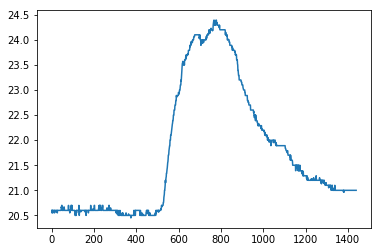

In [16]:
thur2 = df[df.day==12]
thur2 = thur2[['date','CO2', 'Temperature', 'Light' , 'Humidity' ,"hour"]]
thur2.reset_index(inplace=True)

ts9 = thur2.Temperature
plt.plot(ts9)

plt.show()
#giovedi

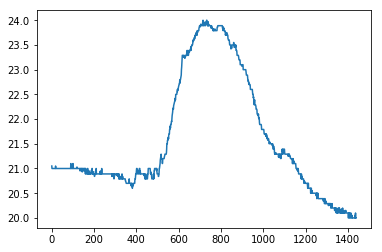

In [17]:
fri2 = df[df.day==13]
fri2 = fri2[['date','CO2', 'Temperature', 'Light' , 'Humidity' ,"hour"]]
fri2.reset_index(inplace=True)

ts10 = fri2.Temperature
plt.plot(ts10)

plt.show()
#venerdi

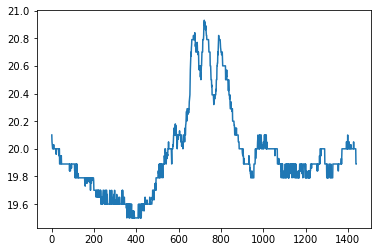

In [18]:
sat2 = df[df.day==14]
sat2 = sat2[['date','CO2', 'Temperature', 'Light' , 'Humidity' ,"hour"]]
sat2.reset_index(inplace=True)

ts11 = sat2.Temperature
plt.plot(ts11)

plt.show()
#sabato

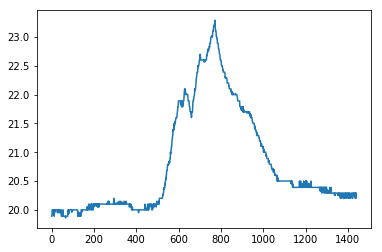

In [19]:
sun2 = df[df.day==15]
sun2 = sun2[['date','CO2', 'Temperature', 'Light' , 'Humidity' ,"hour"]]
sun2.reset_index(inplace=True)

ts12 = sun2.Temperature
plt.plot(ts12)

plt.show()
#domenica

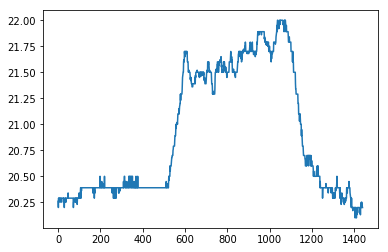

In [20]:
mon3 = df[df.day==16]
mon3 = mon3[['date','CO2', 'Temperature', 'Light' , 'Humidity' ,"hour"]]
mon3.reset_index(inplace=True)

ts13 = mon3.Temperature
plt.plot(ts13)

plt.show()
#lunedi

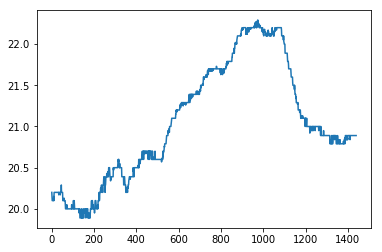

In [21]:
thue3 = df[df.day==17]
thue3 = thue3[['date','CO2', 'Temperature', 'Light' , 'Humidity' ,"hour"]]
thue3.reset_index(inplace=True)

ts14 = thue3.Temperature
plt.plot(ts14)

plt.show()
#martedi

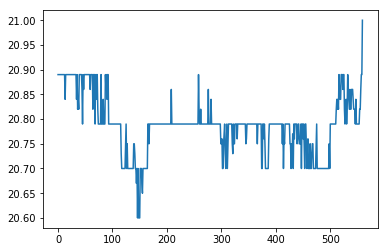

<bound method Series.unique of 0      2015-02-18 00:00:00
1      2015-02-18 00:01:00
2      2015-02-18 00:02:00
3      2015-02-18 00:03:00
4      2015-02-18 00:04:00
5      2015-02-18 00:04:59
6      2015-02-18 00:06:00
7      2015-02-18 00:07:00
8      2015-02-18 00:08:00
9      2015-02-18 00:08:59
10     2015-02-18 00:10:00
11     2015-02-18 00:10:59
12     2015-02-18 00:11:59
13     2015-02-18 00:13:00
14     2015-02-18 00:14:00
15     2015-02-18 00:15:00
16     2015-02-18 00:16:00
17     2015-02-18 00:16:59
18     2015-02-18 00:17:59
19     2015-02-18 00:19:00
20     2015-02-18 00:20:00
21     2015-02-18 00:21:00
22     2015-02-18 00:22:00
23     2015-02-18 00:23:00
24     2015-02-18 00:23:59
25     2015-02-18 00:24:59
26     2015-02-18 00:26:00
27     2015-02-18 00:27:00
28     2015-02-18 00:28:00
29     2015-02-18 00:29:00
              ...         
530    2015-02-18 08:50:00
531    2015-02-18 08:51:00
532    2015-02-18 08:51:59
533    2015-02-18 08:53:00
534    2015-02-18 08:54:

In [22]:
wed3 = df[df.day==18]
wed3 = wed3[['date','CO2', 'Temperature', 'Light' , 'Humidity' ,"hour"]]
wed3.reset_index(inplace=True)

ts15 = wed3.Temperature
plt.plot(ts15)

plt.show()
wed3['date'].unique
#mercoledi
# si puo anche cancellare

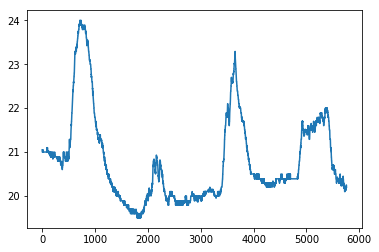

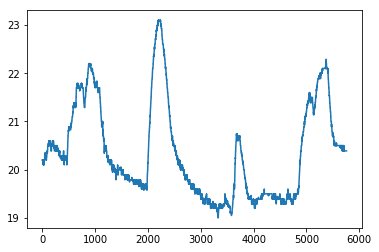

In [23]:
twss2 = df[df['day'].between(13, 16, inclusive=True)]
twss2 = twss2[['date','CO2', 'Temperature', 'Light' , 'Humidity' ,"hour"]]
twss2.reset_index(inplace=True)

tstwss2 = twss2.Temperature
plt.plot(tstwss2)

plt.show()

twss1 = df[df['day'].between(6, 9, inclusive=True)]
twss1 = twss1[['date','CO2', 'Temperature', 'Light' , 'Humidity' ,"hour"]]
twss1.reset_index(inplace=True)

tstwss1 = twss1.Temperature
plt.plot(tstwss1)

plt.show()

## transformations


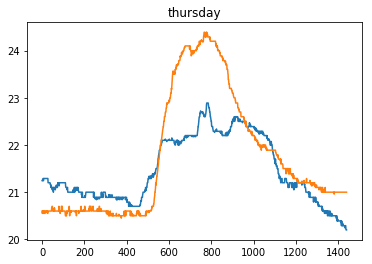

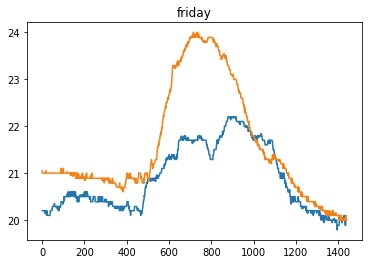

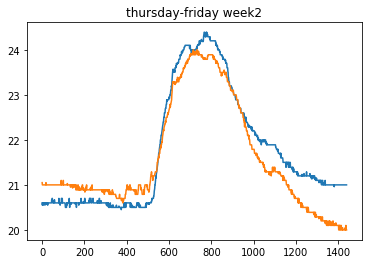

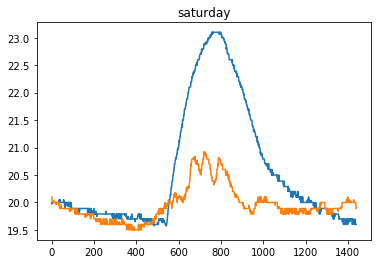

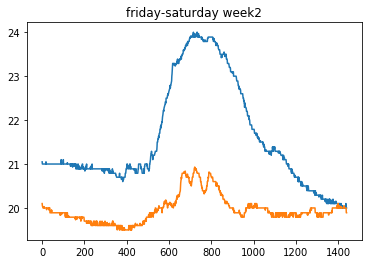

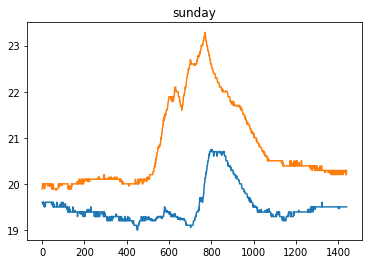

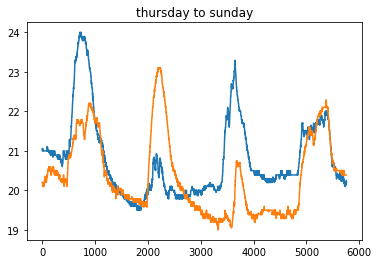

In [24]:
plt.plot(ts2)
plt.plot(ts9)
plt.title("thursday")
plt.show()

plt.plot(ts3)
plt.plot(ts10)
plt.title("friday")
plt.show()

plt.plot(ts9)
plt.plot(ts10)
plt.title("thursday-friday week2")
plt.show()

plt.plot(ts4)
plt.plot(ts11)
plt.title("saturday")
plt.show()

plt.plot(ts10)
plt.plot(ts11)
plt.title("friday-saturday week2")
plt.show()

plt.plot(ts5)
plt.plot(ts12)
plt.title("sunday")
plt.show()

plt.plot(tstwss2)
plt.plot(tstwss1)
plt.title("thursday to sunday")
plt.show()

### Transformation I: Offset Translation

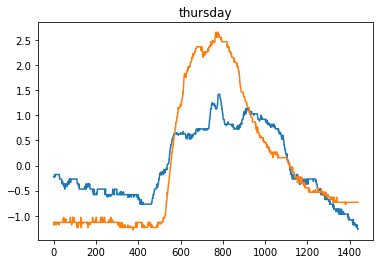

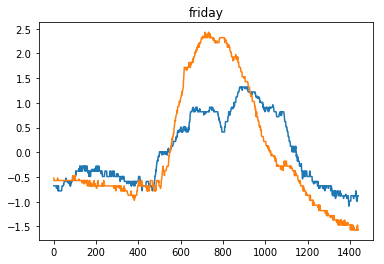

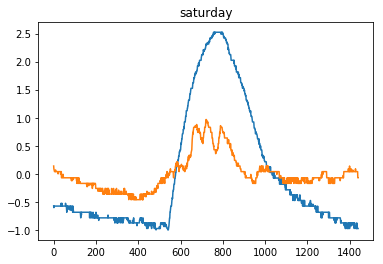

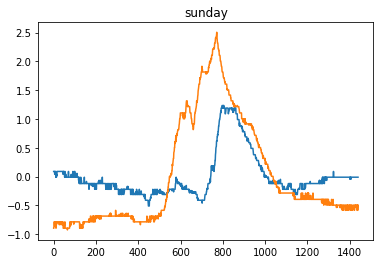

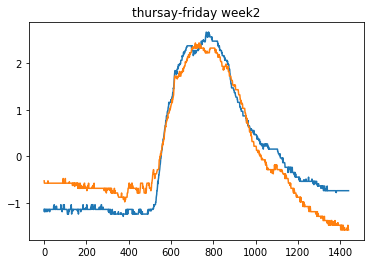

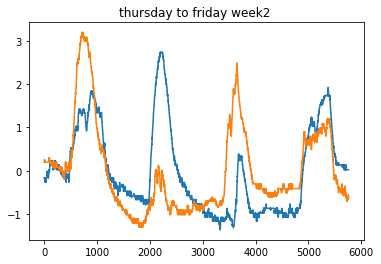

In [25]:
plt.plot(ts2 - ts2.mean())
plt.plot(ts9 - ts9.mean())
plt.title("thursday")
plt.show()

plt.plot(ts3 - ts3.mean())
plt.plot(ts10 - ts10.mean())
plt.title("friday")
plt.show()

plt.plot(ts4 - ts4.mean())
plt.plot(ts11 - ts11.mean())
plt.title("saturday")
plt.show()

plt.plot(ts5 - ts5.mean())
plt.plot(ts12 - ts12.mean())
plt.title("sunday")
plt.show()

plt.plot(ts9 - ts9.mean())
plt.plot(ts10 - ts10.mean())
plt.title("thursay-friday week2")
plt.show()

plt.plot(tstwss1 - tstwss1.mean())
plt.plot(tstwss2 - tstwss2.mean())
plt.title("thursday to friday week2 ")
plt.show()

### Transformation II: Amplitude Scaling

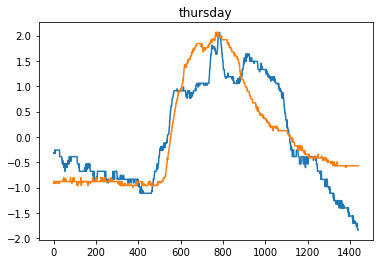

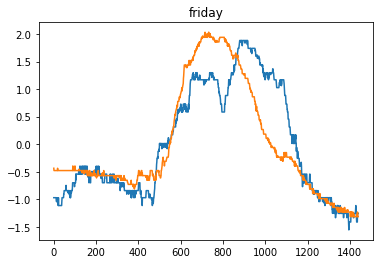

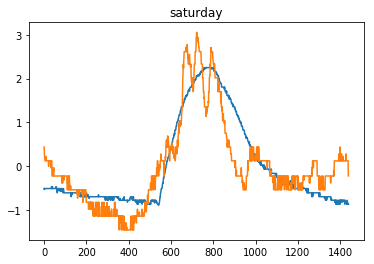

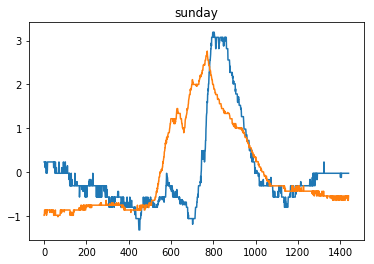

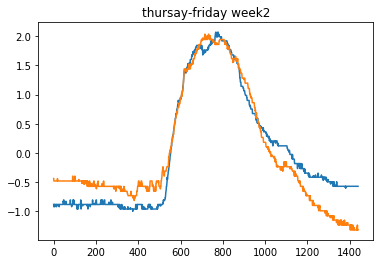

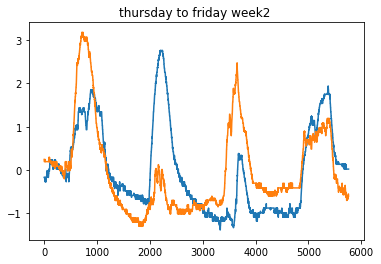

In [26]:
plt.plot((ts2 - ts2.mean())/ts2.std())
plt.plot((ts9 - ts9.mean())/ts9.std())
plt.title("thursday")
plt.show()

plt.plot((ts3 - ts3.mean())/ts3.std())
plt.plot((ts10 - ts10.mean())/ts10.std())
plt.title("friday")
plt.show()

plt.plot((ts4 - ts4.mean())/ts4.std())
plt.plot((ts11 - ts11.mean())/ts11.std())
plt.title("saturday")
plt.show()

plt.plot((ts5 - ts5.mean())/ts5.std())
plt.plot((ts12 - ts12.mean())/ts12.std())
plt.title("sunday")
plt.show()

plt.plot((ts9 - ts9.mean())/ts9.std())
plt.plot((ts10 - ts10.mean())/ts10.std())
plt.title("thursay-friday week2")
plt.show()

plt.plot((tstwss1 - tstwss1.mean())/tstwss1.std())
plt.plot((tstwss2 - tstwss2.mean())/tstwss2.std())
plt.title("thursday to friday week2 ")
plt.show()


### Transformation III: Trend removal

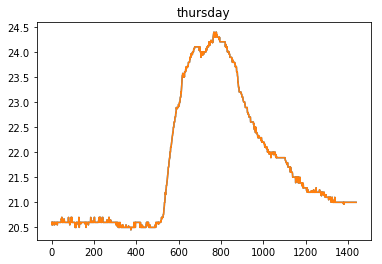

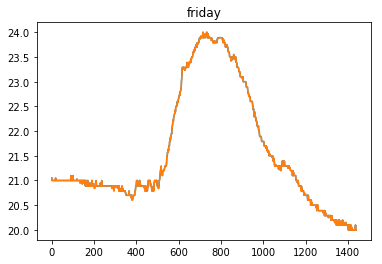

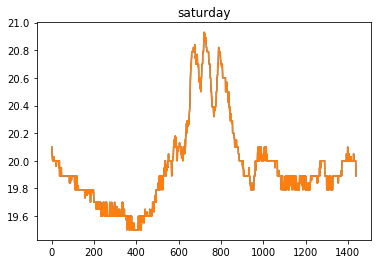

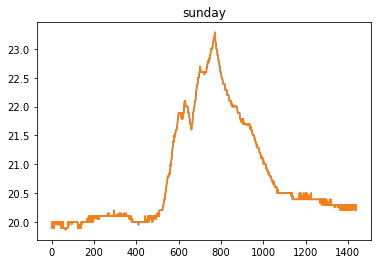

In [27]:
plt.plot(ts9)
plt.plot(ts9.rolling(window=1).mean())
plt.title("thursday")
plt.show()

plt.plot(ts10)
plt.plot(ts10.rolling(window=1).mean())
plt.title("friday")
plt.show()

plt.plot(ts11)
plt.plot(ts11.rolling(window=1).mean())
plt.title("saturday")
plt.show()

plt.plot(ts12)
plt.plot(ts12.rolling(window=1).mean())
plt.title("sunday")
plt.show()


### Transformation IV: Noise (smoothing)

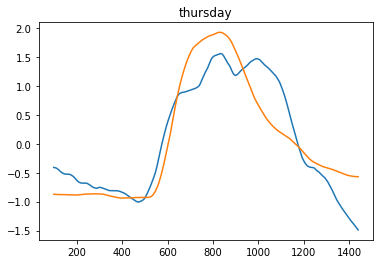

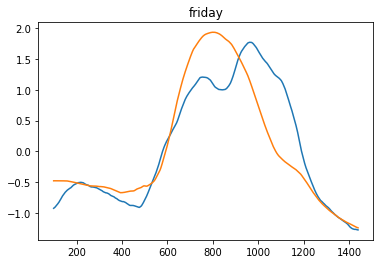

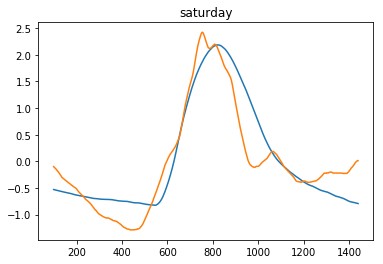

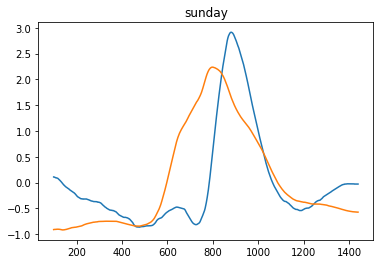

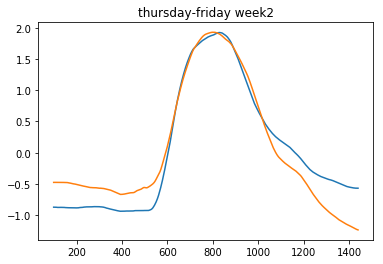

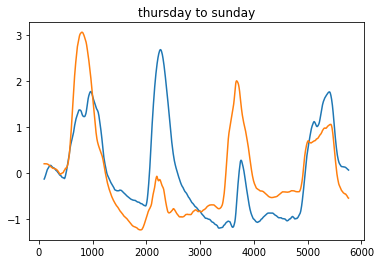

In [28]:
w = 100
plt.plot(((ts2 - ts2.mean())/ts2.std()).rolling(window=w).mean())
plt.plot(((ts9 - ts9.mean())/ts9.std()).rolling(window=w).mean())
plt.title("thursday")
plt.show()

w = 100
plt.plot(((ts3 - ts3.mean())/ts3.std()).rolling(window=w).mean())
plt.plot(((ts10 - ts10.mean())/ts10.std()).rolling(window=w).mean())
plt.title("friday")
plt.show()

w = 100
plt.plot(((ts4 - ts4.mean())/ts4.std()).rolling(window=w).mean())
plt.plot(((ts11 - ts11.mean())/ts11.std()).rolling(window=w).mean())
plt.title("saturday")
plt.show()

w = 100
plt.plot(((ts5 - ts5.mean())/ts5.std()).rolling(window=w).mean())
plt.plot(((ts12 - ts12.mean())/ts12.std()).rolling(window=w).mean())
plt.title("sunday")
plt.show()

w = 100
plt.plot(((ts9 - ts9.mean())/ts9.std()).rolling(window=w).mean())
plt.plot(((ts10 - ts10.mean())/ts10.std()).rolling(window=w).mean())
plt.title("thursday-friday week2")
plt.show()

w = 100
plt.plot(((tstwss1 - tstwss1.mean())/tstwss1.std()).rolling(window=w).mean())
plt.plot(((tstwss2 - tstwss2.mean())/tstwss2.std()).rolling(window=w).mean())
plt.title("thursday to sunday")
plt.show()

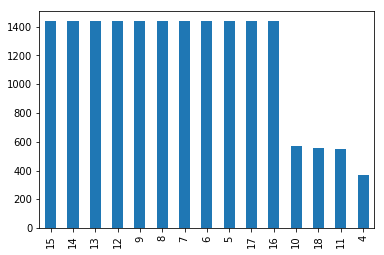

In [29]:
df['day'].value_counts().plot(kind='bar')
plt.show()

#volevo vedere se su tutto il dataset venivano coperte tutte le ore della giornata
#quindi in alcuni giorni ci sono range di tempo limitati (ex 14-23)
# day 4 = mercoledi
# day 10 = martedi
# day 11 = mercoledi
# day 18 = mercoledi

## Distances

### Euclidean distance

In [30]:
from scipy.spatial.distance import euclidean

In [31]:
dist = euclidean(ts2, ts9)
print("thursday: ", dist)
print()
dist = euclidean(ts3, ts10)
print("friday:   ", dist)
print()
dist = euclidean(ts4, ts11)
print("saturday: ", dist)
print()
dist = euclidean(ts5, ts12)
print("sunday: ", dist)
print()
dist = euclidean(ts9, ts10)
print("thursday-friday week2:   ", dist)
print()
dist = euclidean(tstwss1, tstwss2)
print("thursday to friday: ", dist)

thursday:  31.198167792534072

friday:    37.696624397948426

saturday:  40.40730335801521

sunday:  56.61711304381978

thursday-friday week2:    17.917996539792046

thursday to friday:  82.89001657115692


In [32]:
dist = euclidean(ts2[:100], ts9[:100])
print("thursday: ", dist)
print()
dist = euclidean(ts3[:100], ts10[:100])
print("friday:   ", dist)
print()
dist = euclidean(ts4[:100], ts11[:100])
print("saturday: ", dist)
print()
dist = euclidean(ts5[:100], ts12[:100])
print("sunday: ", dist)
print()
dist = euclidean(ts9[:100], ts10[:100])
print("thursday-friday week2:   ", dist)
print()
dist = euclidean(tstwss1[:100], tstwss2[:100])
print("thursday to friday: ", dist)

#qui rispetto ai primi 100 valori

thursday:  5.850177110329406

friday:    7.725397688432897

saturday:  0.7776214624667184

sunday:  4.083279251342523

thursday-friday week2:    3.959356008241733

thursday to friday:  7.725397688432897


### Manhattan Distance

In [33]:
from scipy.spatial.distance import cityblock

In [34]:
dist = cityblock(ts2, ts9)
print("thursday: ", round(dist,2))
print()
dist = cityblock(ts3, ts10)
print("friday:   ", round(dist,2))
print()
dist = cityblock(ts4, ts11)
print("saturday: ", round(dist,2))
print()
dist = cityblock(ts5, ts12)
print("sunday: ", round(dist,2))
print()
dist = cityblock(ts9, ts10)
print("thursday-friday week2:   ", round(dist,2))
print()
dist = cityblock(tstwss1, tstwss2)
print("thursday to friday: ", round(dist,2))


thursday:  879.45

friday:    1045.71

saturday:  980.17

sunday:  1835.73

thursday-friday week2:    595.5

thursday to friday:  4593.77


In [35]:
dist = cityblock(ts2[:100], ts9[:100])
print("thursday: ", round(dist,2))
print()
dist = cityblock(ts3[:100], ts10[:100])
print("friday:   ", round(dist,2))
print()
dist = cityblock(ts4[:100], ts11[:100])
print("saturday: ", round(dist,2))
print()
dist = cityblock(ts5[:100], ts12[:100])
print("sunday: ", round(dist,2))
print()
dist = cityblock(ts9[:100], ts10[:100])
print("thursday-friday week2:   ", round(dist,2))
print()
dist = cityblock(tstwss1[:100], tstwss2[:100])
print("thursday to friday: ", round(dist,2))

thursday:  57.81

friday:    76.78

saturday:  5.75

sunday:  40.47

thursday-friday week2:    39.45

thursday to friday:  76.78


STIAMO FACENDO UN CONFRONTO POINT-TO-POINT

## Dynamic Time Warping

In [39]:
from tslearn.metrics import dtw, dtw_path, cdist_dtw, subsequence_cost_matrix
from scipy.spatial.distance import cdist

In [40]:
dist = dtw(ts2, ts9)
print("thursday: ", dist)
print()
dist = dtw(ts3, ts10)
print("friday:   ", dist)
print()
dist = dtw(ts4, ts11)
print("saturday: ", dist)
print()
dist = dtw(ts5, ts12)
print("sunday: ", dist)
print()
dist = dtw(ts9, ts10)
print("thursday-friday week2:   ", dist)
print()
dist = dtw(tstwss1, tstwss2)
print("thursday to friday: ", dist)

thursday:  20.988212812989374

friday:    27.379508475013594

saturday:  29.671381815367837

sunday:  37.288008615371076

thursday-friday week2:    12.584093133793978

thursday to friday:  41.746116511666365


In [178]:
path, dist = dtw_path(ts2, ts9)

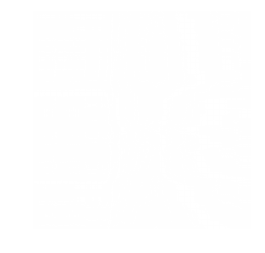

In [179]:
mat = cdist(ts2.values[:].reshape(-8,8), ts9.values[:].reshape(-8,8))

plt.imshow(mat)
plt.axis("off")
plt.autoscale(False)
for i in range(mat.shape[0]):
    for j in range(mat.shape[1]):
        text = plt.text(j, i, '%.1f' % mat[i, j], ha="center", va="center", color="w")
    

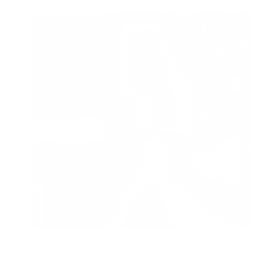

In [180]:
acc = subsequence_cost_matrix(ts2.values[:].reshape(-8,8), ts9.values[:].reshape(-8,8))

plt.imshow(acc)
plt.axis("off")
plt.autoscale(False)
for i in range(acc.shape[0]):
    for j in range(acc.shape[1]):
        text = plt.text(j, i, '%.1f' % np.sqrt(acc[i, j]), ha="center", va="center", color="w")


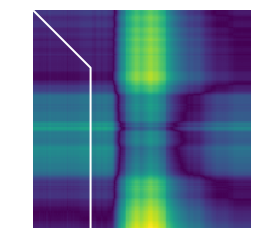

In [181]:
plt.imshow(mat)
plt.axis("off")
plt.autoscale(False)
plt.plot([j for (i, j) in path], [i for (i, j) in path], "w-", linewidth=2.)
plt.show()

In [73]:
path1, dist1 = dtw_path(ts9, ts10)

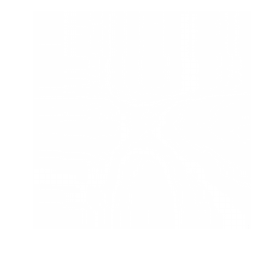

In [74]:
mat = cdist(ts9.values[:].reshape(-8,8), ts10.values[:].reshape(-8,8))

plt.imshow(mat)
plt.axis("off")
plt.autoscale(False)
for i in range(mat.shape[0]):
    for j in range(mat.shape[1]):
        text = plt.text(j, i, '%.1f' % mat[i, j], ha="center", va="center", color="w")
        
#è time consuming. più si aumenta la dimensione della matrice e più aumenta il tempo di esecuzione

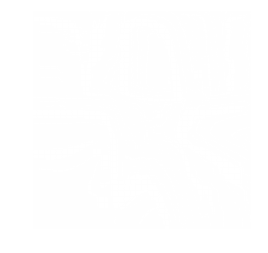

In [75]:
acc = subsequence_cost_matrix(ts9.values[:].reshape(-8,8), ts10.values[:].reshape(-8,8))

plt.imshow(acc)
plt.axis("off")
plt.autoscale(False)
for i in range(acc.shape[0]):
    for j in range(acc.shape[1]):
        text = plt.text(j, i, '%.1f' % np.sqrt(acc[i, j]), ha="center", va="center", color="w")

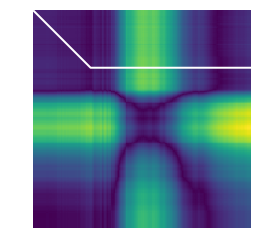

In [76]:
plt.imshow(mat)
plt.axis("off")
plt.autoscale(False)
plt.plot([j for (i, j) in path1], [i for (i, j) in path1], "w-", linewidth=2.)
plt.show()

In [69]:
path, dist = dtw_path(tstwss1, tstwss2)

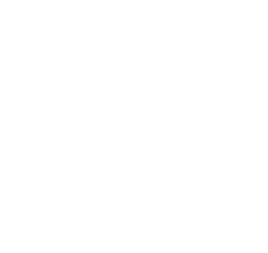

In [70]:
mat1 = cdist(tstwss1.values[:].reshape(-12,12), tstwss2.values[:].reshape(-12,12))

plt.imshow(mat1)
plt.axis("off")
plt.autoscale(False)
for i in range(mat1.shape[0]):
    for j in range(mat1.shape[1]):
        text = plt.text(j, i, '%.1f' % mat1[i, j], ha="center", va="center", color="w")

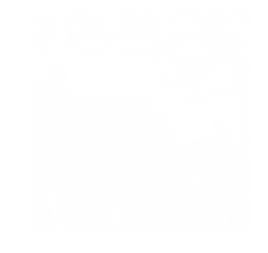

In [71]:
acc1 = subsequence_cost_matrix(tstwss1.values[:].reshape(-12,12), tstwss2.values[:].reshape(-12,12))

plt.imshow(acc1)
plt.axis("off")
plt.autoscale(False)
for i in range(acc1.shape[0]):
    for j in range(acc1.shape[1]):
        text = plt.text(j, i, '%.1f' % np.sqrt(acc1[i, j]), ha="center", va="center", color="w")

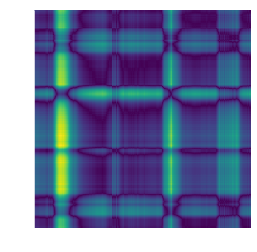

In [72]:
plt.imshow(mat1)
plt.axis("off")
plt.autoscale(False)
plt.plot([j for (i, j) in path], [i for (i, j) in path], "w-", linewidth=2.)
plt.show()

# motifs 


In [36]:
from keras.optimizers import Adagrad
from tslearn.shapelets import ShapeletModel
from tslearn.shapelets import grabocka_params_to_shapelet_size_dict

from tslearn.preprocessing import TimeSeriesScalerMinMax

Using TensorFlow backend.
/Users/marco/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.cluster.k_means_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


In [37]:
from matrixprofile import *

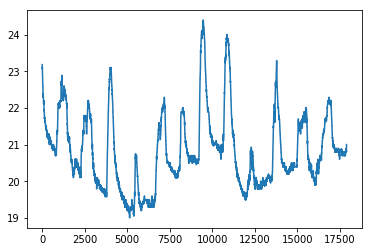

In [46]:
ts = df.Temperature
plt.plot(ts)

plt.show()

#### matrix profile

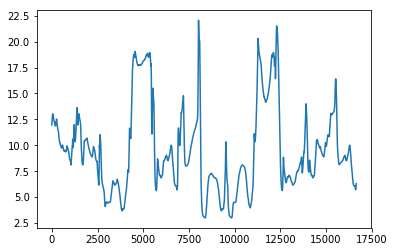

In [41]:
w = 1250
mp, mpi = matrixProfile.stomp(ts.values, w)

plt.plot(mp)
plt.show()

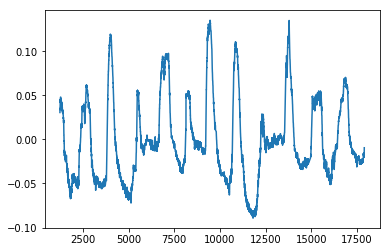

In [42]:
window = 1250
ts_log_mov_diff = pd.Series(np.log(ts) - np.log(ts).rolling(window, center=False).mean(), index=ts.index)

plt.plot(ts_log_mov_diff)
plt.show()

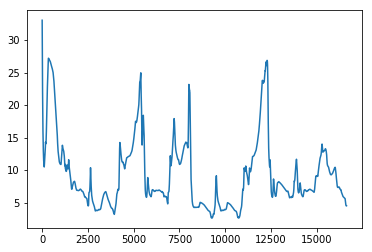

In [43]:
w = 1250
mp, mpi = matrixProfile.stomp(ts_log_mov_diff.values[11:], w)

plt.plot(mp)
plt.show()

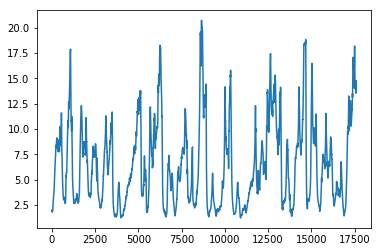

In [44]:
w = 312
mp, mpi = matrixProfile.stomp(ts.values, w)

plt.plot(mp)
plt.show()

#### motifs

In [45]:
mo, mod  = motifs.motifs(ts.values, (mp, mpi), max_motifs=5)

In [46]:
mo

[[4005, 9440, 10911, 13834],
 [3656, 6507, 9073, 10521],
 [1321, 2798, 7115, 8243, 15448, 16889],
 [46, 1568, 4239, 5516, 9739, 11224],
 [671, 5227, 7901, 13346, 14784]]

In [47]:
mod

[1.2093786719756896,
 1.3179567107500838,
 1.4136059460223005,
 1.7048604394297104,
 1.9975479444749276]

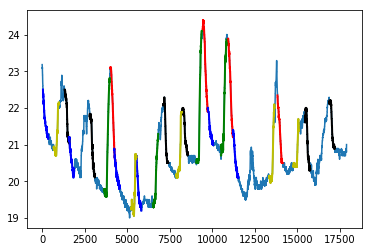

In [48]:
plt.plot(ts.values)
colors = ['r', 'g', 'k', 'b', 'y'][:len(mo)]
for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = ts.values[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=2)

plt.show()

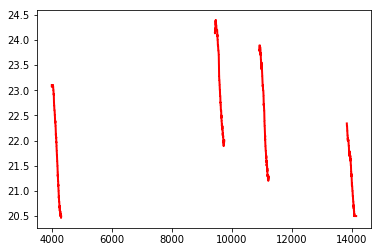

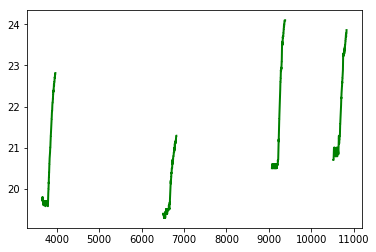

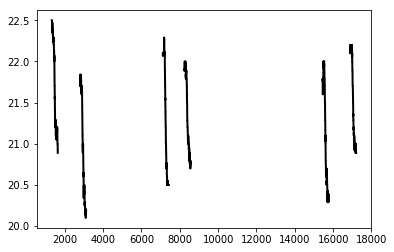

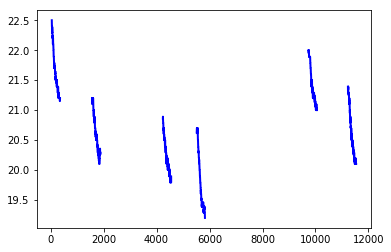

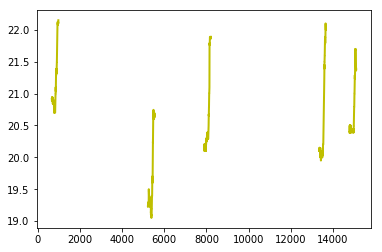

In [49]:
for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = ts.values[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=2)
    plt.show()

## Anomaly detection

In [50]:
from matrixprofile.discords import discords

In [51]:
anoms = discords(mp, ex_zone=5, k=10)

In [52]:
anoms

array([8651, 8660, 8644, 8632, 8638, 8672, 8665, 8702, 8692, 8686])

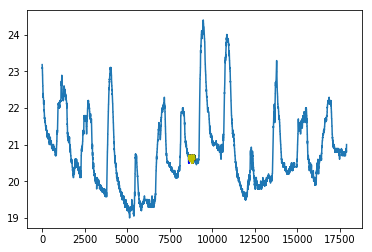

In [53]:
plt.plot(ts.values)
colors = ['r', 'g', 'k', 'b', 'y'][:len(mo)]
for a, c in zip(anoms, colors):
    a_shape = ts.values[a:a+w]
    plt.plot(range(a, a+w), a_shape, color=c, lw=2)

plt.show()

### Shapelet discovery

In [93]:
df_ts = pd.DataFrame(df, columns = ['Temperature', 'Occupancy'])
print(df_ts.head())
df_ts.shape

   Temperature  Occupancy
0        23.18          1
1        23.15          1
2        23.15          1
3        23.15          1
4        23.10          1


(17895, 2)

In [94]:
class_name = 'Occupancy'

In [97]:
X = np.array

TypeError: data type not understood

In [95]:
X = np.array(df_ts)
y = np.array(df_ts['Occupancy'])

n_ts, ts_sz = X.shape
n_classes = len(set(y))

# Set the number of shapelets per size as done in the original paper
shapelet_sizes = grabocka_params_to_shapelet_size_dict(n_ts=n_ts,
                                                       ts_sz=ts_sz,
                                                       n_classes=n_classes,
                                                       l=0.1,
                                                       r=1)

print('n_ts', n_ts)
print('ts_sz', ts_sz)
print('n_classes', n_classes)
print('shapelet_sizes', shapelet_sizes)

n_ts 17895
ts_sz 2
n_classes 2
shapelet_sizes {1: 4}


In [96]:
X.shape

(17895, 2)

In [90]:
df_ts[attributes].values

array([[23.18],
       [23.15],
       [23.15],
       ...,
       [20.89],
       [20.89],
       [21.  ]])

In [91]:
shp_clf = ShapeletModel(n_shapelets_per_size=shapelet_sizes,
                        optimizer="sgd",
                        weight_regularizer=.01,
                        max_iter=400,
                        verbose=1)


In [92]:
shp_clf.fit(X,y)

Epoch 1/400
17895/17895 [==============================] - 0s 15us/step - loss: nan - binary_accuracy: 0.0551 - binary_crossentropy: nan        
Epoch 2/400
17895/17895 [==============================] - 0s 7us/step - loss: nan - binary_accuracy: 0.0000e+00 - binary_crossentropy: nan
Epoch 3/400
17895/17895 [==============================] - 0s 7us/step - loss: nan - binary_accuracy: 0.0000e+00 - binary_crossentropy: nan
Epoch 4/400
17895/17895 [==============================] - 0s 7us/step - loss: nan - binary_accuracy: 0.0000e+00 - binary_crossentropy: nan
Epoch 5/400
17895/17895 [==============================] - 0s 7us/step - loss: nan - binary_accuracy: 0.0000e+00 - binary_crossentropy: nan
Epoch 6/400
17895/17895 [==============================] - 0s 7us/step - loss: nan - binary_accuracy: 0.0000e+00 - binary_crossentropy: nan
Epoch 7/400
17895/17895 [==============================] - 0s 7us/step - loss: nan - binary_accuracy: 0.0000e+00 - binary_crossentropy: nan
Epoch 8/400
178

17895/17895 [==============================] - 0s 7us/step - loss: nan - binary_accuracy: 0.0000e+00 - binary_crossentropy: nan
Epoch 60/400
17895/17895 [==============================] - 0s 7us/step - loss: nan - binary_accuracy: 0.0000e+00 - binary_crossentropy: nan
Epoch 61/400
17895/17895 [==============================] - 0s 7us/step - loss: nan - binary_accuracy: 0.0000e+00 - binary_crossentropy: nan
Epoch 62/400
17895/17895 [==============================] - 0s 7us/step - loss: nan - binary_accuracy: 0.0000e+00 - binary_crossentropy: nan
Epoch 63/400
17895/17895 [==============================] - 0s 7us/step - loss: nan - binary_accuracy: 0.0000e+00 - binary_crossentropy: nan
Epoch 64/400
17895/17895 [==============================] - 0s 7us/step - loss: nan - binary_accuracy: 0.0000e+00 - binary_crossentropy: nan
Epoch 65/400
17895/17895 [==============================] - 0s 9us/step - loss: nan - binary_accuracy: 0.0000e+00 - binary_crossentropy: nan
Epoch 66/400
17895/17895 [

17895/17895 [==============================] - 0s 9us/step - loss: nan - binary_accuracy: 0.0000e+00 - binary_crossentropy: nan
Epoch 117/400
17895/17895 [==============================] - 0s 7us/step - loss: nan - binary_accuracy: 0.0000e+00 - binary_crossentropy: nan
Epoch 118/400
17895/17895 [==============================] - 0s 11us/step - loss: nan - binary_accuracy: 0.0000e+00 - binary_crossentropy: nan
Epoch 119/400
17895/17895 [==============================] - 0s 12us/step - loss: nan - binary_accuracy: 0.0000e+00 - binary_crossentropy: nan
Epoch 120/400
17895/17895 [==============================] - 0s 12us/step - loss: nan - binary_accuracy: 0.0000e+00 - binary_crossentropy: nan
Epoch 121/400
17895/17895 [==============================] - 0s 13us/step - loss: nan - binary_accuracy: 0.0000e+00 - binary_crossentropy: nan
Epoch 122/400
17895/17895 [==============================] - 0s 10us/step - loss: nan - binary_accuracy: 0.0000e+00 - binary_crossentropy: nan
Epoch 123/400
1

17895/17895 [==============================] - 0s 7us/step - loss: nan - binary_accuracy: 0.0000e+00 - binary_crossentropy: nan
Epoch 174/400
17895/17895 [==============================] - 0s 7us/step - loss: nan - binary_accuracy: 0.0000e+00 - binary_crossentropy: nan
Epoch 175/400
17895/17895 [==============================] - 0s 9us/step - loss: nan - binary_accuracy: 0.0000e+00 - binary_crossentropy: nan
Epoch 176/400
17895/17895 [==============================] - 0s 10us/step - loss: nan - binary_accuracy: 0.0000e+00 - binary_crossentropy: nan
Epoch 177/400
17895/17895 [==============================] - 0s 9us/step - loss: nan - binary_accuracy: 0.0000e+00 - binary_crossentropy: nan
Epoch 178/400
17895/17895 [==============================] - 0s 8us/step - loss: nan - binary_accuracy: 0.0000e+00 - binary_crossentropy: nan
Epoch 179/400
17895/17895 [==============================] - 0s 8us/step - loss: nan - binary_accuracy: 0.0000e+00 - binary_crossentropy: nan
Epoch 180/400
17895

17895/17895 [==============================] - 0s 7us/step - loss: nan - binary_accuracy: 0.0000e+00 - binary_crossentropy: nan
Epoch 231/400
17895/17895 [==============================] - 0s 7us/step - loss: nan - binary_accuracy: 0.0000e+00 - binary_crossentropy: nan
Epoch 232/400
17895/17895 [==============================] - 0s 7us/step - loss: nan - binary_accuracy: 0.0000e+00 - binary_crossentropy: nan
Epoch 233/400
17895/17895 [==============================] - 0s 6us/step - loss: nan - binary_accuracy: 0.0000e+00 - binary_crossentropy: nan
Epoch 234/400
17895/17895 [==============================] - 0s 6us/step - loss: nan - binary_accuracy: 0.0000e+00 - binary_crossentropy: nan
Epoch 235/400
17895/17895 [==============================] - 0s 6us/step - loss: nan - binary_accuracy: 0.0000e+00 - binary_crossentropy: nan
Epoch 236/400
17895/17895 [==============================] - 0s 7us/step - loss: nan - binary_accuracy: 0.0000e+00 - binary_crossentropy: nan
Epoch 237/400
17895/

17895/17895 [==============================] - 0s 7us/step - loss: nan - binary_accuracy: 0.0000e+00 - binary_crossentropy: nan
Epoch 288/400
17895/17895 [==============================] - 0s 7us/step - loss: nan - binary_accuracy: 0.0000e+00 - binary_crossentropy: nan
Epoch 289/400
17895/17895 [==============================] - 0s 7us/step - loss: nan - binary_accuracy: 0.0000e+00 - binary_crossentropy: nan
Epoch 290/400
17895/17895 [==============================] - 0s 8us/step - loss: nan - binary_accuracy: 0.0000e+00 - binary_crossentropy: nan
Epoch 291/400
17895/17895 [==============================] - 0s 7us/step - loss: nan - binary_accuracy: 0.0000e+00 - binary_crossentropy: nan
Epoch 292/400
17895/17895 [==============================] - 0s 8us/step - loss: nan - binary_accuracy: 0.0000e+00 - binary_crossentropy: nan
Epoch 293/400
17895/17895 [==============================] - 0s 9us/step - loss: nan - binary_accuracy: 0.0000e+00 - binary_crossentropy: nan
Epoch 294/400
17895/

KeyboardInterrupt: 

In [58]:
from sklearn.metrics import accuracy_score

In [59]:
predicted_labels = shp_clf.predict(X)
print("Correct classification rate:", accuracy_score(y, predicted_labels))

17895/17895 [==============================] - 0s 5us/step
Correct classification rate: 0.8501816149762503


In [60]:
predicted_locations = shp_clf.locate(X)

/Users/marco/opt/anaconda3/lib/python3.7/site-packages/tslearn/utils.py:63: UserWarning: 2-Dimensional data passed. Assuming these are 17895 1-dimensional timeseries
  '{} 1-dimensional timeseries'.format(X.shape[0]))


17895/17895 [==============================] - 0s 5us/step


In [52]:
predicted_locations

array([[1, 0, 0, 1],
       [1, 0, 0, 1],
       [1, 0, 0, 1],
       ...,
       [1, 0, 0, 1],
       [1, 0, 0, 1],
       [1, 0, 0, 1]])

In [77]:
y.shape

(17895,)

In [81]:
shapelet_sizes.values()

dict_values([4])

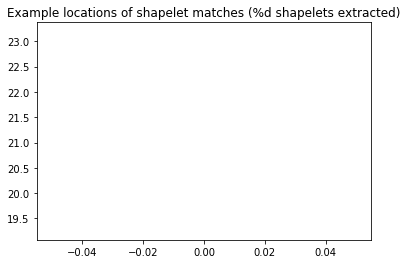

In [61]:
ts_id = 0
plt.figure()
n_shapelets = sum(shapelet_sizes.values())
plt.title("Example locations of shapelet matches "
          "(%d shapelets extracted)".format(n_shapelets))

plt.plot(X[ts_id].ravel())
for idx_shp, shp in enumerate(shp_clf.shapelets_):
    t0 = predicted_locations[ts_id, idx_shp]
    plt.plot(np.arange(t0, t0 + len(shp)), shp, linewidth=2)

## Shaplet Discovery 2

In [65]:
from shapelets_lts.classification import LtsShapeletClassifier

In [74]:
classifier = LtsShapeletClassifier(
    K=20,
    R=3,
    L_min=30,
    epocs=50,
    lamda=0.01,
    eta=0.01,
    shapelet_initialization='segments_centroids',
    plot_loss=True
)

In [75]:
classifier.fit(X, y)

Network initialization ...
Using training data to initialize shaplets


ValueError: negative dimensions are not allowed